In [91]:
#I had to download a few packages that I hadn't had installed before hand.
import sys
!{sys.executable} -m pip install geopandas
import sys
!{sys.executable} -m pip install Shapely
import sys
!{sys.executable} -m pip install lightgbm
import sys
!{sys.executable} -m pip install dython

In [183]:
#importing the packages I will use and more.
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
from dython.nominal import associations

In [211]:
#Reading in the csv. The wals csv is in the same folder as this Python file in Jupyter notebooks.
df = pd.read_csv('wals.csv')

In [185]:
#Checking the shape first thing so I can know the number of rows and columns. 
df.shape

(2679, 202)

In [186]:
#It is important to understand the data. I would want to know the missing pieces right off the bat so I can
#get a better idea of what is in the data and what the data lacks.
df.isnull().sum()

wals_code                                                                        1
iso_code                                                                        61
glottocode                                                                      19
Name                                                                             0
latitude                                                                         0
                                                                              ... 
21B Exponence of Tense-Aspect-Mood Inflection                                 2519
108B Productivity of the Antipassive Construction                             2493
130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand'    2607
58B Number of Possessive Nouns                                                2436
79B Suppletion in Imperatives and Hortatives                                  2486
Length: 202, dtype: int64

In [212]:
#I removed columns that had less than 1,250 non-NA values. This was a more trial and error number. I was left with 
#19 columns after this trimming, which I believe is a good amount to play with. The columns I was left with are
#columns such as Subject-Verb Order, Object-Verb Order, etc. which I remember being important for languages from
#my time in high school. I then reset the index, so removed rows would not take up a number.
df=df.dropna(axis=1,thresh=1250)
df = df.reset_index(drop=True)

In [213]:
#I removed rows that had missing values in any of the rows listed. These rows seemed to be universal, so I figured
#the languages with missing values were missing data so they could not be analyzed correctly. 
df.dropna(subset = ["macroarea"], inplace=True)
df.dropna(subset = ["iso_code"], inplace=True)
df.dropna(subset = ["glottocode"], inplace=True)
df.dropna(subset = ["wals_code"], inplace=True)
df.dropna(subset = ["82A Order of Subject and Verb"], inplace=True)
df.dropna(subset = ["81A Order of Subject, Object and Verb"], inplace=True)
df.dropna(subset = ["83A Order of Object and Verb"], inplace=True)
df.dropna(subset = ["87A Order of Adjective and Noun"], inplace=True)

In [189]:
#I decided to view the unique values, meaning values that did not have a duplicate. It showed there were 1,162 languages
#6 macroareas, and a handful of Orders.
df.nunique()

wals_code                                                                                    1162
iso_code                                                                                     1137
glottocode                                                                                   1138
Name                                                                                         1162
latitude                                                                                      568
longitude                                                                                     784
genus                                                                                         381
family                                                                                        178
macroarea                                                                                       6
countrycodes                                                                                  253
81A Order of Subject

In [190]:
df

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,"81A Order of Subject, Object and Verb",82A Order of Subject and Verb,83A Order of Object and Verb,87A Order of Adjective and Noun,97A Relationship between the Order of Object and Verb and the Order of Adjective and Noun,143F Postverbal Negative Morphemes,143E Preverbal Negative Morphemes,143A Order of Negative Morpheme and Verb,143G Minor morphological means of signaling negation
7,abi,axb,abip1241,Abipón,-29.000000,-61.000000,South Guaicuruan,Guaicuruan,South America,AR,2 SVO,1 SV,2 VO,3 No dominant order,5 Other,4 None,1 NegV,1 NegV,4 None
8,abk,abk,abkh1244,Abkhaz,43.083333,41.000000,Northwest Caucasian,Northwest Caucasian,Eurasia,GE,1 SOV,1 SV,1 OV,2 Noun-Adjective,2 OV and NAdj,2 [V-Neg],2 [Neg-V],11 Type 3 / Type 4,4 None
10,abn,ard,arab1267,Arabana,-28.250000,136.250000,Central Pama-Nyungan,Pama-Nyungan,Australia,AU,1 SOV,1 SV,1 OV,2 Noun-Adjective,2 OV and NAdj,4 None,1 NegV,1 NegV,4 None
11,abo,arv,arbo1245,Arbore,5.000000,36.750000,Lowland East Cushitic,Afro-Asiatic,Africa,ET,1 SOV,1 SV,1 OV,2 Noun-Adjective,2 OV and NAdj,NaN,NaN,NaN,NaN
12,abu,kgr,abun1252,Abun,-0.500000,132.500000,North-Central Bird's Head,West Papuan,Papunesia,ID,2 SVO,1 SV,2 VO,2 Noun-Adjective,4 VO and NAdj,1 VNeg,1 NegV,14 ObligDoubleNeg,4 None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,zch,zoh,chim1300,Zoque (Chimalapa),16.750000,-94.750000,Mixe-Zoque,Mixe-Zoque,North America,MX,2 SVO,1 SV,2 VO,1 Adjective-Noun,3 VO and AdjN,2 [V-Neg],1 NegV,15 OptDoubleNeg,4 None
2668,zqc,zoc,copa1236,Zoque (Copainalá),17.000000,-93.250000,Mixe-Zoque,Mixe-Zoque,North America,MX,4 VOS,2 VS,2 VO,1 Adjective-Noun,3 VO and AdjN,4 None,3 NegV&[Neg-V],7 Type 1 / Type 3,4 None
2675,zul,zul,zulu1248,Zulu,-30.000000,30.000000,Bantoid,Niger-Congo,Africa,ZA,2 SVO,1 SV,2 VO,2 Noun-Adjective,4 VO and NAdj,2 [V-Neg],2 [Neg-V],15 OptDoubleNeg,4 None
2676,zun,zun,zuni1245,Zuni,35.083333,-108.833333,Zuni,Zuni,North America,US,1 SOV,1 SV,1 OV,2 Noun-Adjective,2 OV and NAdj,2 [V-Neg],1 NegV,14 ObligDoubleNeg,4 None


In [191]:
#The next two cells are codes to map the languages on a global grid. This was my first time doing something like this
#and it came out pretty decent. A lot of the languages are located in populous areas such as Southeast Asia, and 
#Sub-Saharan Africa. Also, places with a lot of remaining indigenuous tribes are rich with languages, such as the 
#Eastern Pacific and Amazon Rainforest areas. Interestingly, the Eastern US and most of Europe do not contain many
#languages. 
geometry=[Point(xy) for xy in zip(df['longitude'],df['latitude'])]
gdf=GeoDataFrame(df,geometry=geometry)

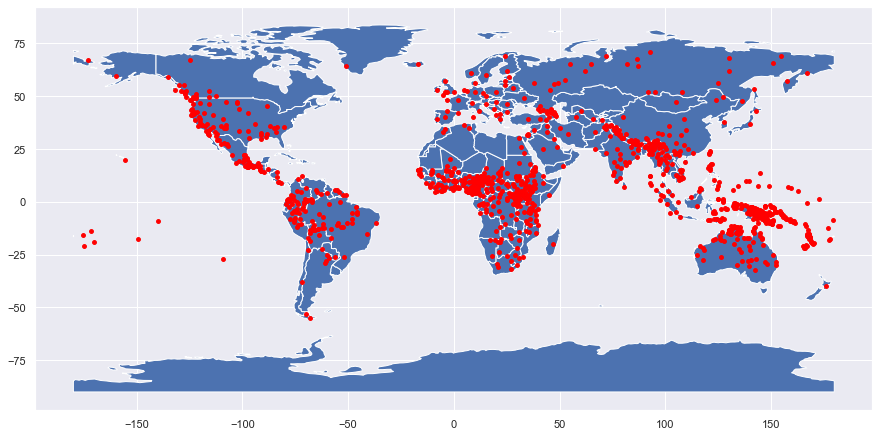

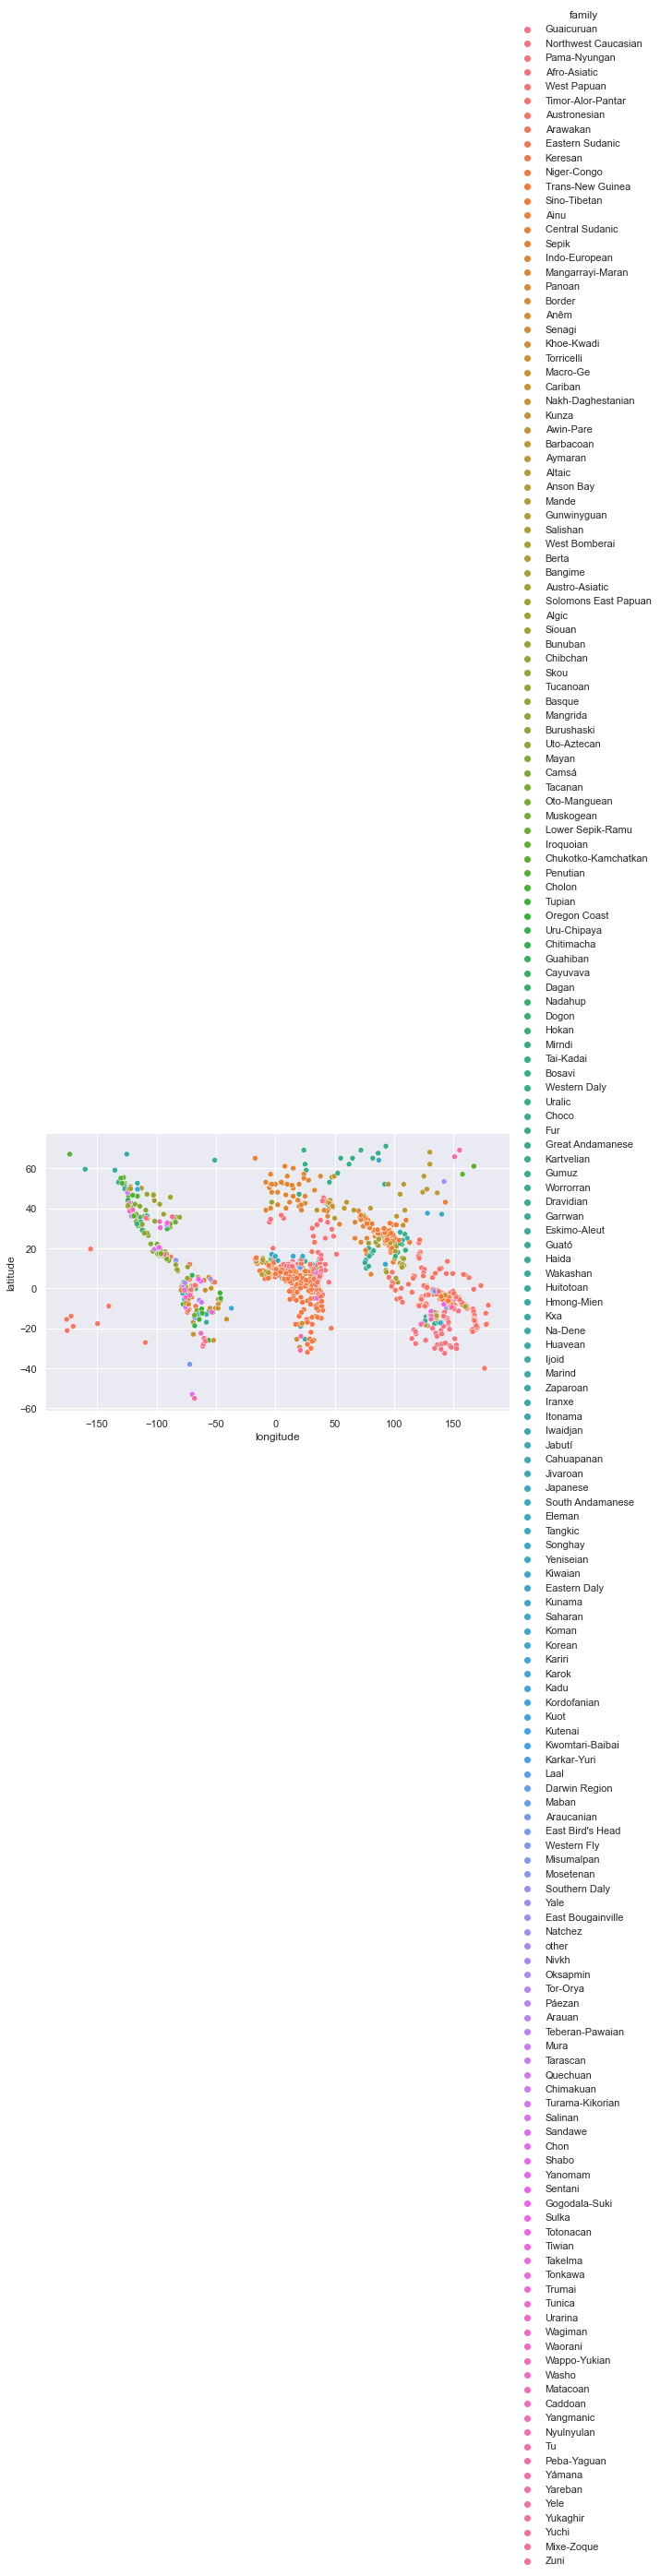

In [192]:
#The second plot here is a bit more messy. It uses the dataframe where the 'family' column is out of order to plot
#the languages and is color coded by 'family'. Since that column is out of order, the map does not explain much.
#However, you can kind of see the continents via the dots, which is fascinating. In a bit more abstract waay, it shows
#how far humans have explored, and how they have found new ways to communicate wherever they have settled. 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

sns.relplot(data=df, x='longitude', y='latitude', hue='family', aspect=1.61)
plt.show()

In [193]:
#Here I am creating a new dataframe I can use in the next cell to redo the second map from above. I sorted by 'macroarea'
#because, as explained later on, it correlates well with 'genus' and 'family'.
df2=df.sort_values(by=['macroarea'],ignore_index=True)

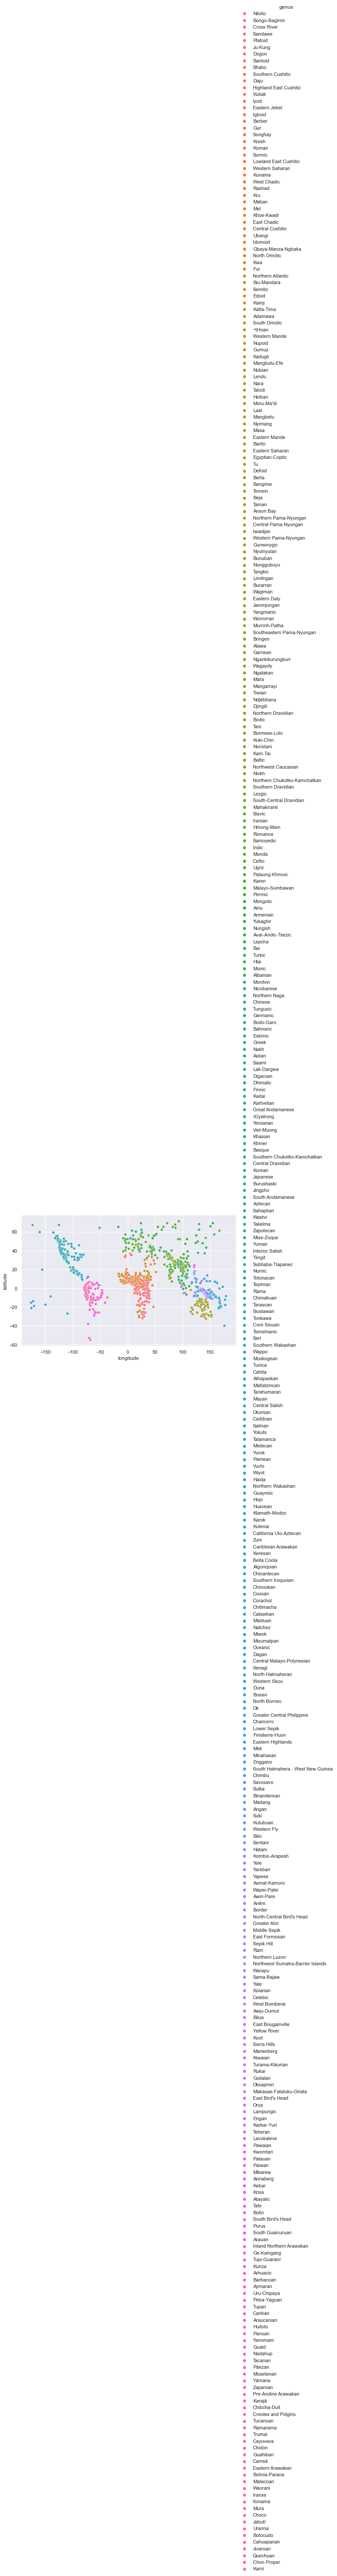

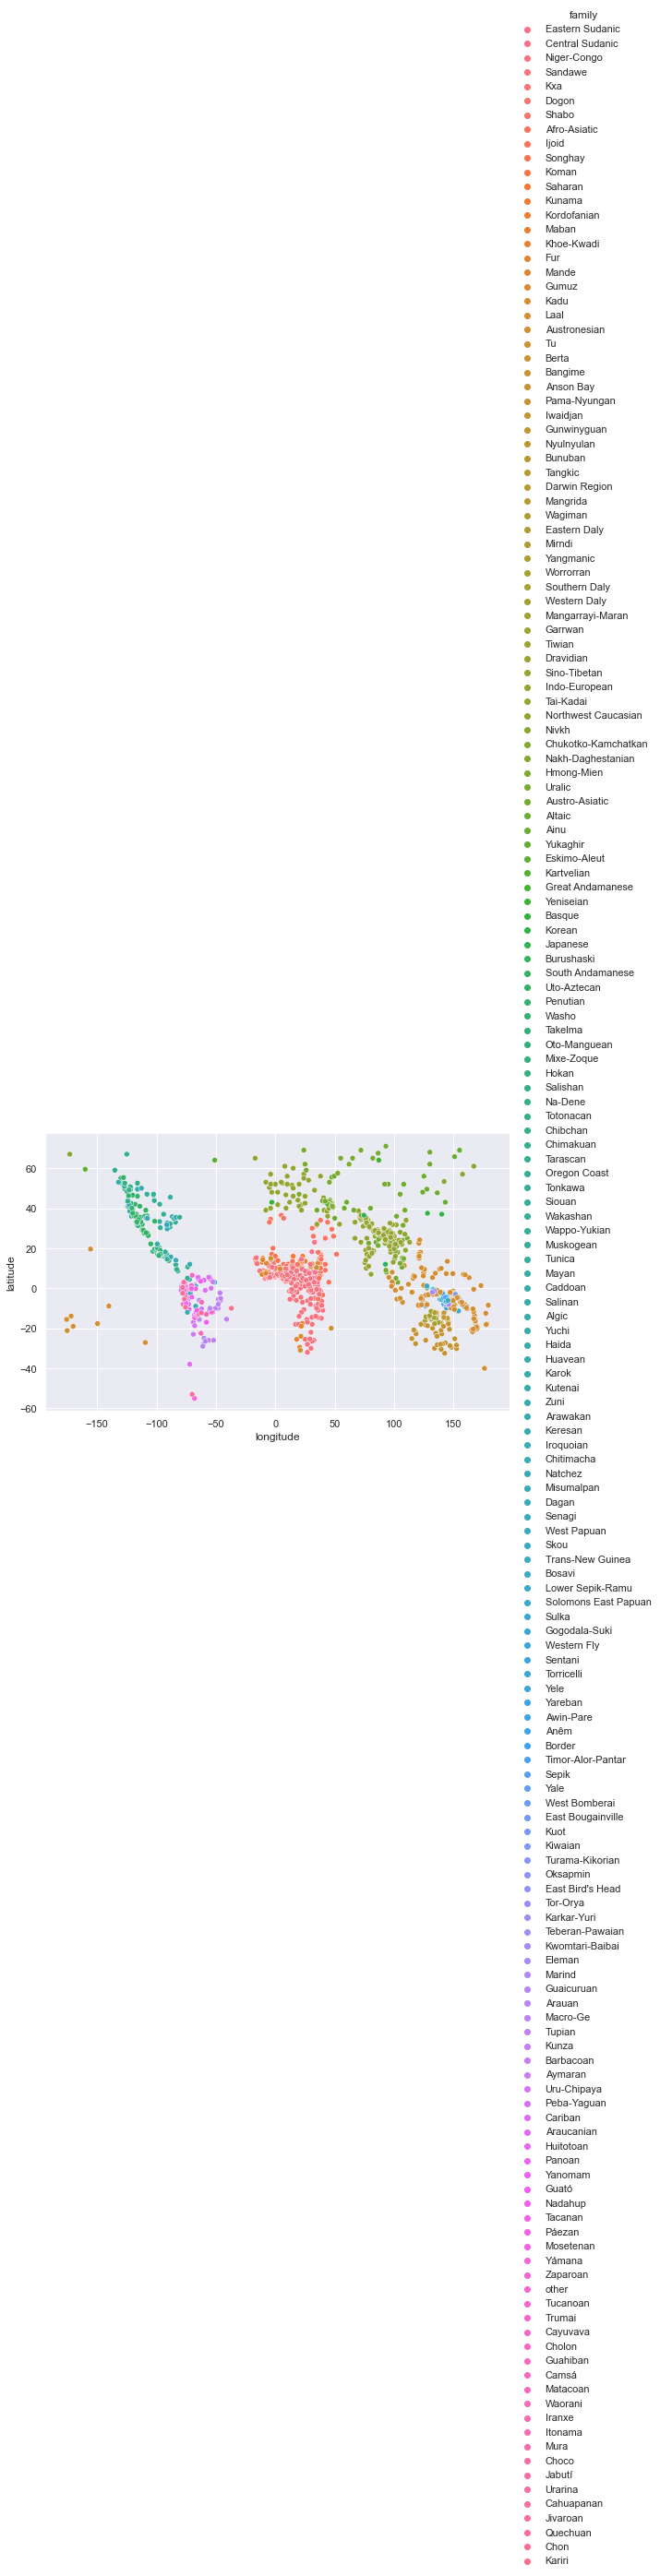

In [194]:
#These two maps show how similar 'family' and 'genus' are almost perfectly divided by 'macroarea'. Since df2 was sorted
#the colors, representing 'genus' and then 'family' hug the outlines of continents and barriers in a stunning way.
#For example, the 'genus' in Africa is basically brown and pink. As soon as you leave the continent, you see the
#greens of Europe and Asia. 
sns.relplot(data=df2, x='longitude', y='latitude', hue='genus', aspect=1.61)
plt.show()

sns.relplot(data=df2, x='longitude', y='latitude', hue='family', aspect=1.61)
plt.show()

In [195]:
#I ran a KMeans, which would group the datapoints by the parameters I pass through the function. I passed through 
#latitude and longitude.
X = np.array(df[['latitude','longitude']])
kmeans = KMeans(n_clusters=6,random_state=100)
kmeans.fit(X)
df['cluster']=kmeans.predict(X)
cluster=kmeans.fit_predict(X)

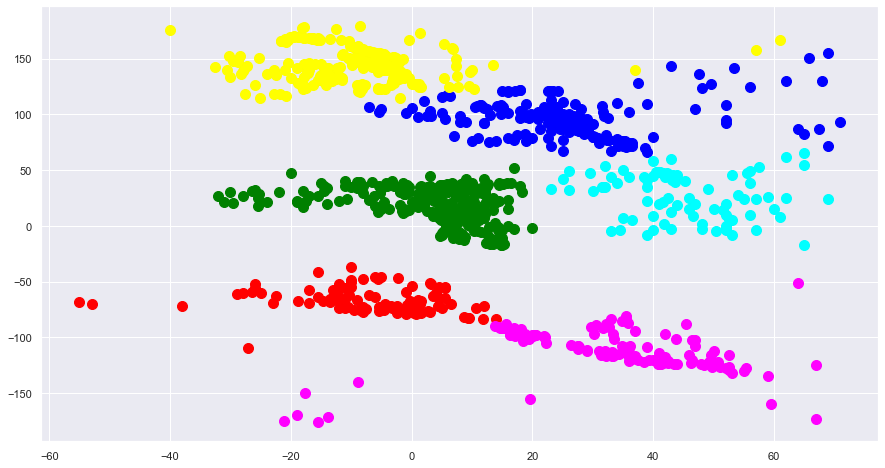

In [196]:
#The KMeans is beautifully split into 6 clusters, which mirrors the 6 macroareas we have, per the unique function above. 
plt.scatter(X[cluster==0,0],X[cluster==0,1],s=100,c='red')
plt.scatter(X[cluster==1,0],X[cluster==1,1],s=100,c='blue')
plt.scatter(X[cluster==2,0],X[cluster==2,1],s=100,c='yellow')
plt.scatter(X[cluster==3,0],X[cluster==3,1],s=100,c='green')
plt.scatter(X[cluster==4,0],X[cluster==4,1],s=100,c='magenta')
plt.scatter(X[cluster==5,0],X[cluster==5,1],s=100,c='cyan')

In [197]:
#If you set the cluster to equal any of the numbers, the macroarea is almost all one value. This means the KMeans split up
#the data really well in macroarea. A lot of the same family and genus are found repeatedly in only one cluster. 
df.loc[df['cluster']==4]

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,82A Order of Subject and Verb,83A Order of Object and Verb,87A Order of Adjective and Noun,97A Relationship between the Order of Object and Verb and the Order of Adjective and Noun,143F Postverbal Negative Morphemes,143E Preverbal Negative Morphemes,143A Order of Negative Morpheme and Verb,143G Minor morphological means of signaling negation,geometry,cluster
23,aco,kjq,west2632,Acoma,34.916667,-107.583333,Keresan,Keresan,North America,US,...,1 SV,3 No dominant order,3 No dominant order,5 Other,2 [V-Neg],1 NegV,8 Type 1 / Type 4,4 None,POINT (-107.58333 34.91667),4
223,bco,blc,bell1243,Bella Coola,52.500000,-126.666667,Bella Coola,Salishan,North America,CA,...,2 VS,2 VO,1 Adjective-Noun,3 VO and AdjN,4 None,1 NegV,1 NegV,4 None,POINT (-126.66667 52.50000),4
284,bla,bla,siks1238,Blackfoot,50.000000,-112.666667,Algonquian,Algic,North America,CA US,...,3 No dominant order,2 VO,1 Adjective-Noun,3 VO and AdjN,4 None,2 [Neg-V],3 [Neg-V],4 None,POINT (-112.66667 50.00000),4
295,blx,bll,bilo1248,Biloxi,30.500000,-88.666667,Core Siouan,Siouan,North America,US,...,1 SV,1 OV,2 Noun-Adjective,2 OV and NAdj,1 VNeg,2 [Neg-V],15 OptDoubleNeg,4 None,POINT (-88.66667 30.50000),4
405,cah,chl,cahu1264,Cahuilla,33.500000,-116.250000,California Uto-Aztecan,Uto-Aztecan,North America,US,...,1 SV,1 OV,1 Adjective-Noun,1 OV and AdjN,4 None,1 NegV,1 NegV,4 None,POINT (-116.25000 33.50000),4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,zap,zaw,mitl1236,Zapotec (Mitla),16.800000,-96.250000,Zapotecan,Oto-Manguean,North America,MX,...,2 VS,2 VO,2 Noun-Adjective,4 VO and NAdj,4 None,2 [Neg-V],3 [Neg-V],4 None,POINT (-96.25000 16.80000),4
2659,zch,zoh,chim1300,Zoque (Chimalapa),16.750000,-94.750000,Mixe-Zoque,Mixe-Zoque,North America,MX,...,1 SV,2 VO,1 Adjective-Noun,3 VO and AdjN,2 [V-Neg],1 NegV,15 OptDoubleNeg,4 None,POINT (-94.75000 16.75000),4
2668,zqc,zoc,copa1236,Zoque (Copainalá),17.000000,-93.250000,Mixe-Zoque,Mixe-Zoque,North America,MX,...,2 VS,2 VO,1 Adjective-Noun,3 VO and AdjN,4 None,3 NegV&[Neg-V],7 Type 1 / Type 3,4 None,POINT (-93.25000 17.00000),4
2676,zun,zun,zuni1245,Zuni,35.083333,-108.833333,Zuni,Zuni,North America,US,...,1 SV,1 OV,2 Noun-Adjective,2 OV and NAdj,2 [V-Neg],1 NegV,14 ObligDoubleNeg,4 None,POINT (-108.83333 35.08333),4


In [198]:
df.loc[(df['83A Order of Object and Verb'] == '2 VO')]

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,82A Order of Subject and Verb,83A Order of Object and Verb,87A Order of Adjective and Noun,97A Relationship between the Order of Object and Verb and the Order of Adjective and Noun,143F Postverbal Negative Morphemes,143E Preverbal Negative Morphemes,143A Order of Negative Morpheme and Verb,143G Minor morphological means of signaling negation,geometry,cluster
7,abi,axb,abip1241,Abipón,-29.000000,-61.000000,South Guaicuruan,Guaicuruan,South America,AR,...,1 SV,2 VO,3 No dominant order,5 Other,4 None,1 NegV,1 NegV,4 None,POINT (-61.00000 -29.00000),0
12,abu,kgr,abun1252,Abun,-0.500000,132.500000,North-Central Bird's Head,West Papuan,Papunesia,ID,...,1 SV,2 VO,2 Noun-Adjective,4 VO and NAdj,1 VNeg,1 NegV,14 ObligDoubleNeg,4 None,POINT (132.50000 -0.50000),2
17,acg,aca,acha1250,Achagua,4.416667,-72.250000,Inland Northern Arawakan,Arawakan,South America,CO,...,1 SV,2 VO,2 Noun-Adjective,4 VO and NAdj,4 None,1 NegV,1 NegV,4 None,POINT (-72.25000 4.41667),0
20,acl,ach,acol1236,Acholi,3.000000,32.666667,Nilotic,Eastern Sudanic,Africa,UG SD,...,1 SV,2 VO,2 Noun-Adjective,4 VO and NAdj,1 VNeg,1 NegV,6 Type 1 / Type 2,4 None,POINT (32.66667 3.00000),3
27,adi,adj,adio1239,Adioukrou,5.416667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,1 SV,2 VO,2 Noun-Adjective,4 VO and NAdj,2 [V-Neg],4 None,4 [V-Neg],4 None,POINT (-4.58333 5.41667),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,zap,zaw,mitl1236,Zapotec (Mitla),16.800000,-96.250000,Zapotecan,Oto-Manguean,North America,MX,...,2 VS,2 VO,2 Noun-Adjective,4 VO and NAdj,4 None,2 [Neg-V],3 [Neg-V],4 None,POINT (-96.25000 16.80000),4
2659,zch,zoh,chim1300,Zoque (Chimalapa),16.750000,-94.750000,Mixe-Zoque,Mixe-Zoque,North America,MX,...,1 SV,2 VO,1 Adjective-Noun,3 VO and AdjN,2 [V-Neg],1 NegV,15 OptDoubleNeg,4 None,POINT (-94.75000 16.75000),4
2668,zqc,zoc,copa1236,Zoque (Copainalá),17.000000,-93.250000,Mixe-Zoque,Mixe-Zoque,North America,MX,...,2 VS,2 VO,1 Adjective-Noun,3 VO and AdjN,4 None,3 NegV&[Neg-V],7 Type 1 / Type 3,4 None,POINT (-93.25000 17.00000),4
2675,zul,zul,zulu1248,Zulu,-30.000000,30.000000,Bantoid,Niger-Congo,Africa,ZA,...,1 SV,2 VO,2 Noun-Adjective,4 VO and NAdj,2 [V-Neg],2 [Neg-V],15 OptDoubleNeg,4 None,POINT (30.00000 -30.00000),3


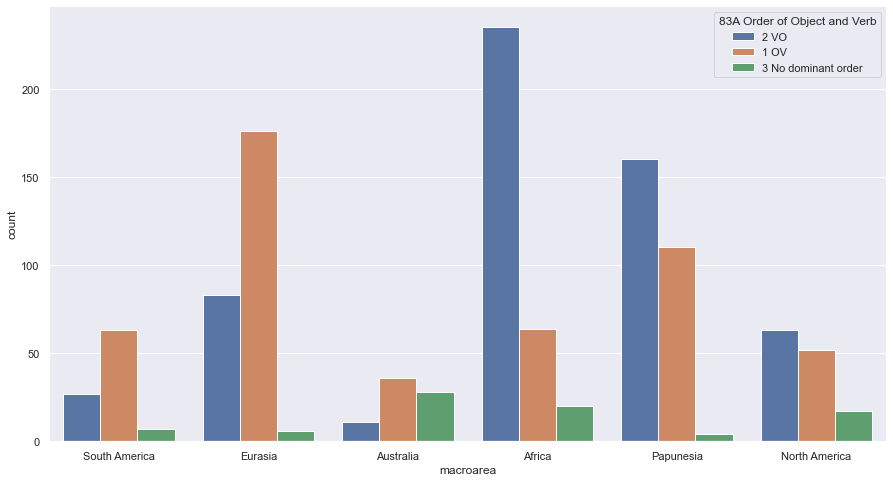

In [199]:
#Languages usually have order of Object and Verb. Seems to be mixed, with Verb coming first in Africa, Papunesia, and
#North America. And the contrary is true in the other macroareas. These are simple bar graphs of the count of the
#occurence. 
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x="macroarea",hue="83A Order of Object and Verb", data=df)

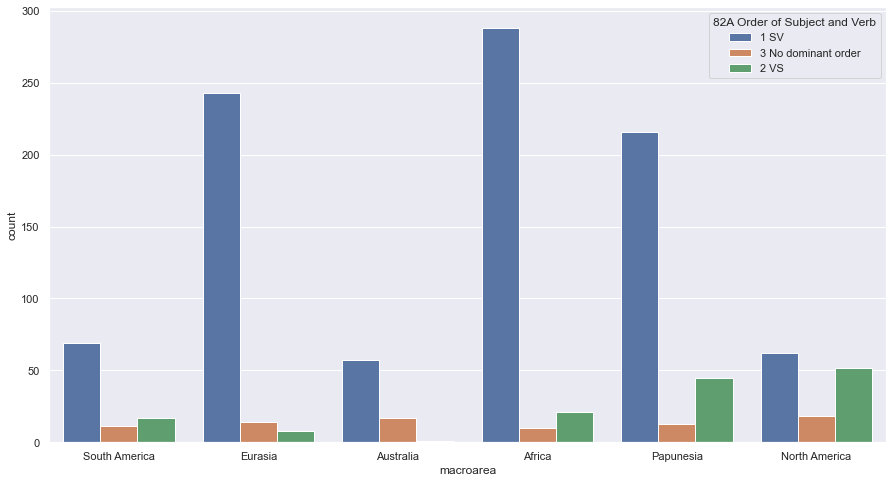

In [200]:
#Languages usually have order of Subject and Verb. Seems to be Subject first dominant in all areas. Curiously, North
#America has Verb-Subject close in number to Subject-Verb.
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x="macroarea",hue="82A Order of Subject and Verb", data=df)

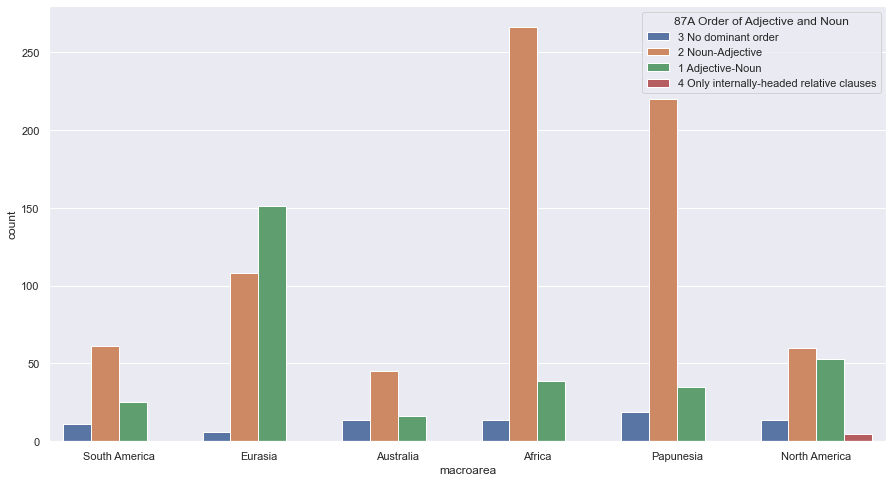

In [201]:
#Languages usually have order of Adjective and Noun. Seems to be Noun first in all areas except for Eurasia, where
#the Adjective is slightly ahead. These three plots showcase language universals, or aspects that every language has.
#The orders might be different among languages, but virtually every language has adjectives, objects, nouns, verbs etc.
#Languages seem to have a tendency to have rules in relation to the order of the type of words tho. 
sns.set_theme(style="ticks")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x="macroarea",hue="87A Order of Adjective and Noun", data=df)

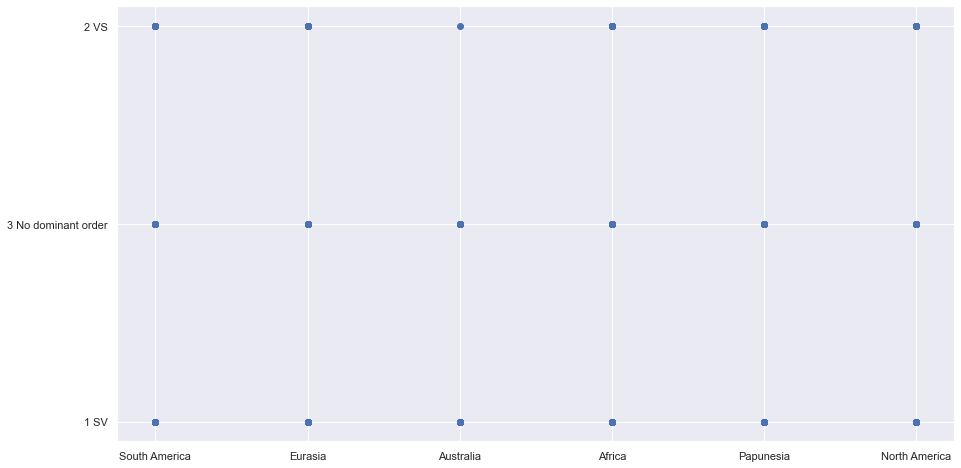

In [202]:
plt.scatter(df.macroarea, df['82A Order of Subject and Verb'])
plt.show()

In [203]:
#Even though the data is mostly categorical, I was wondering if I can run a correlation matrix. After some digging,
#I was able to find away. Obviously, a lot of the columns do not have much correlation.
#NOTE: RUN THIS immediately AFTER DROPPING THE COLUMNS OTHERWISE THERE IS AN ARRAY ERROR. I BELIEVE IT MIGHT BE BECAUSE OF THE GEOMETRY COLUMN. 
associations(df, nominal_columns='auto', numerical_columns=None,mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/dython/nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  avg = a.mean(axis)


ValueError: setting an array element with a sequence.

In [205]:
#However, macroarea seems to correlate well with genus and family as talked about earlier. This makes sense because,
#as shown from the map, genus and family seem to stay in one area globally.
#NOTE: RUN THIS immediately AFTER DROPPING THE COLUMNS OTHERWISE THERE IS AN ARRAY ERROR. I BELIEVE IT MIGHT BE BECAUSE OF THE GEOMETRY COLUMN. 
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(20,20))

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/dython/nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  avg = a.mean(axis)


ValueError: setting an array element with a sequence.

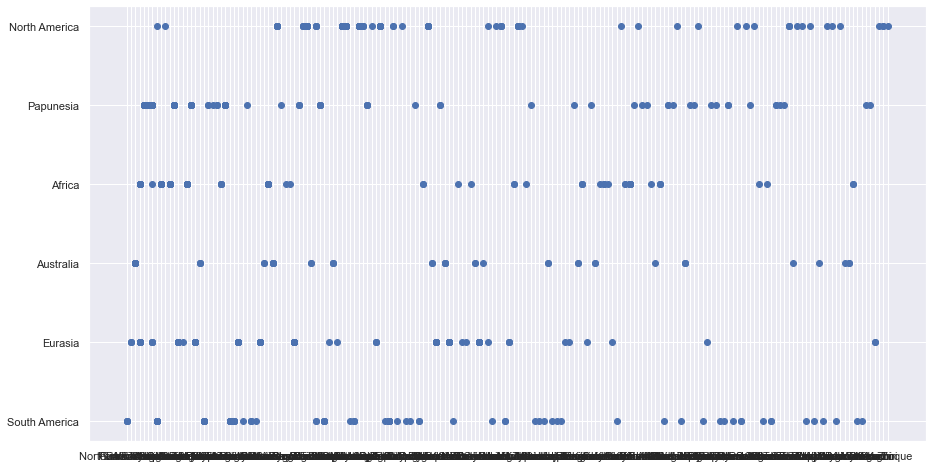

In [204]:
plt.scatter(df['family'], df['macroarea'], s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 

In [106]:
#I would like to be able to guess the area from just the name of the language. The family of a language seems to 
#be unique to the area of the world. This is not 100% accurate, if I had to guess. Especially since the correlation
#is not 1.00. But it seems to be a relatibely simple way to find the area. I would love to learn a model that can
#work with categorical data to predict an area based off the rules of word order and genus. Maybe some sort of network. 
df.loc[df['macroarea']=='North America'].family.unique()

array(['Keresan', 'Salishan', 'Algic', 'Siouan', 'Chibchan',
       'Uto-Aztecan', 'Mayan', 'Oto-Manguean', 'Muskogean', 'Iroquoian',
       'Penutian', 'Oregon Coast', 'Chitimacha', 'Hokan', 'Arawakan',
       'Haida', 'Wakashan', 'Na-Dene', 'Huavean', 'Karok', 'Kutenai',
       'Misumalpan', 'Natchez', 'Tarascan', 'Chimakuan', 'Salinan',
       'Totonacan', 'Takelma', 'Tonkawa', 'Tunica', 'Wappo-Yukian',
       'Washo', 'Caddoan', 'Eskimo-Aleut', 'Yuchi', 'Mixe-Zoque', 'Zuni'],
      dtype=object)

In [134]:
#So what I did was add the unique family names of a macroarea to a list.
listNA=('Keresan', 'Salishan', 'Algic', 'Siouan', 'Chibchan',
       'Uto-Aztecan', 'Mayan', 'Oto-Manguean', 'Muskogean', 'Iroquoian',
       'Penutian', 'Oregon Coast', 'Chitimacha', 'Hokan', 'Arawakan',
       'Haida', 'Wakashan', 'Na-Dene', 'Huavean', 'Karok', 'Kutenai',
       'Misumalpan', 'Natchez', 'Tarascan', 'Chimakuan', 'Salinan',
       'Totonacan', 'Takelma', 'Tonkawa', 'Tunica', 'Wappo-Yukian',
       'Washo', 'Caddoan', 'Eskimo-Aleut', 'Yuchi', 'Mixe-Zoque', 'Zuni')

In [174]:
#The user would input a language name.
lang = input('Enter your language here:')

Enter your language here:Acholi


In [175]:
def f(a):
    return df.loc[df['Name'] == lang, 'family'].item()

In [140]:
if f(lang) in listNA:
    print('North America')
else:
    print('No')

North America


In [164]:
df.loc[df['macroarea']=='Papunesia'].family.unique()

array(['West Papuan', 'Timor-Alor-Pantar', 'Austronesian',
       'Trans-New Guinea', 'Sepik', 'Border', 'Anêm', 'Senagi',
       'Torricelli', 'Awin-Pare', 'West Bomberai', 'Solomons East Papuan',
       'Skou', 'Lower Sepik-Ramu', 'Dagan', 'Bosavi', 'Marind', 'Eleman',
       'Kiwaian', 'Kuot', 'Kwomtari-Baibai', 'Karkar-Yuri',
       "East Bird's Head", 'Western Fly', 'Yale', 'East Bougainville',
       'Oksapmin', 'Tor-Orya', 'Teberan-Pawaian', 'Turama-Kikorian',
       'Sentani', 'Gogodala-Suki', 'Sulka', 'Yareban', 'Yele'],
      dtype=object)

In [177]:
f(lang)

'Eastern Sudanic'

In [156]:
listSA=['Guaicuruan', 'Arawakan', 'Panoan', 'Macro-Ge', 'Cariban', 'Kunza',
       'Barbacoan', 'Aymaran', 'Tucanoan', 'Camsá', 'Tacanan', 'Cholon',
       'Tupian', 'Uru-Chipaya', 'Guahiban', 'Cayuvava', 'Nadahup',
       'Choco', 'Guató', 'Huitotoan', 'Chibchan', 'Zaparoan', 'Iranxe',
       'Itonama', 'Jabutí', 'Cahuapanan', 'Jivaroan', 'Kariri',
       'Araucanian', 'Mosetenan', 'other', 'Páezan', 'Arauan', 'Mura',
       'Quechuan', 'Chon', 'Yanomam', 'Trumai', 'Urarina', 'Waorani',
       'Matacoan', 'Peba-Yaguan', 'Yámana']

In [158]:
listEU=['Northwest Caucasian', 'Austronesian', 'Sino-Tibetan', 'Ainu',
       'Indo-European', 'Afro-Asiatic', 'Nakh-Daghestanian', 'Altaic',
       'Austro-Asiatic', 'Basque', 'Burushaski', 'Chukotko-Kamchatkan',
       'Tai-Kadai', 'Uralic', 'Great Andamanese', 'Kartvelian',
       'Dravidian', 'Eskimo-Aleut', 'Hmong-Mien', 'Japanese',
       'South Andamanese', 'Yeniseian', 'Korean', 'Nivkh', 'Yukaghir']

In [161]:
listAU=['Pama-Nyungan', 'Mangarrayi-Maran', 'Anson Bay', 'Gunwinyguan',
       'Bunuban', 'Mangrida', 'Mirndi', 'Western Daly', 'Worrorran',
       'Garrwan', 'Iwaidjan', 'Tangkic', 'Eastern Daly', 'Darwin Region',
       'Southern Daly', 'Tiwian', 'Wagiman', 'Yangmanic', 'Nyulnyulan']

In [167]:
listAF=['Afro-Asiatic', 'Eastern Sudanic', 'Niger-Congo',
       'Central Sudanic', 'Khoe-Kwadi', 'Mande', 'Berta', 'Bangime',
       'Dogon', 'Fur', 'Gumuz', 'Kxa', 'Ijoid', 'Songhay', 'Kunama',
       'Saharan', 'Koman', 'Kadu', 'Kordofanian', 'Laal', 'Maban',
       'Austronesian', 'Sandawe', 'Shabo', 'Tu']

In [166]:
listPA=['West Papuan', 'Timor-Alor-Pantar', 'Austronesian',
       'Trans-New Guinea', 'Sepik', 'Border', 'Anêm', 'Senagi',
       'Torricelli', 'Awin-Pare', 'West Bomberai', 'Solomons East Papuan',
       'Skou', 'Lower Sepik-Ramu', 'Dagan', 'Bosavi', 'Marind', 'Eleman',
       'Kiwaian', 'Kuot', 'Kwomtari-Baibai', 'Karkar-Yuri',
       "East Bird's Head", 'Western Fly', 'Yale', 'East Bougainville',
       'Oksapmin', 'Tor-Orya', 'Teberan-Pawaian', 'Turama-Kikorian',
       'Sentani', 'Gogodala-Suki', 'Sulka', 'Yareban', 'Yele']

In [178]:
#And based off the name of the language, the program would identify the family value associated with that name. The program
#would then print the name of the macroarea where the family is found. I would love to run an accuracy test in the future.
#This was influenced and inspired by KMeans and the correlation matrix. 
if f(lang) in listNA:
    print('Language is from North America')
elif f(lang) in listSA:
    print('Language is from South America')
elif f(lang) in listEU:
    print('Language is from Europe')
elif f(lang) in listAU:
    print('Language is from Australia')
elif f(lang) in listAF:
    print('Language is from Africa')
else:
    print('Language is from Papunesia')

Language is from Africa


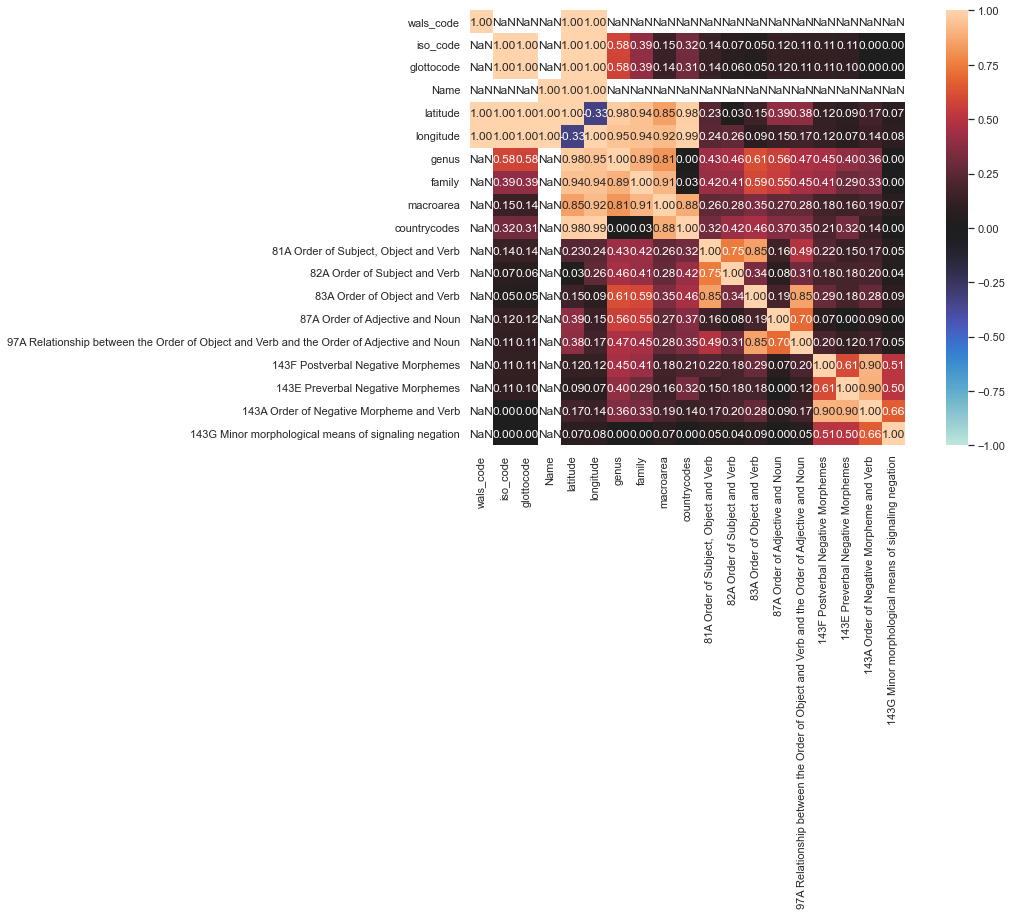

{'corr':                                                     wals_code  iso_code  \
 wals_code                                                 1.0  0.000000   
 iso_code                                                  0.0  1.000000   
 glottocode                                                0.0  0.999560   
 Name                                                      0.0  0.000000   
 latitude                                                  1.0  0.999958   
 longitude                                                 1.0  0.999987   
 genus                                                     0.0  0.578366   
 family                                                    0.0  0.394728   
 macroarea                                                 0.0  0.147059   
 countrycodes                                              0.0  0.315805   
 81A Order of Subject, Object and Verb                     0.0  0.139206   
 82A Order of Subject and Verb                             0.0  0.070369   
 83A

In [214]:
associations(df, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)